***PhiUSIIL_Phishing_URL_Prediction***

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
#load data
df=pd.read_csv('PhiUSIIL_Phishing_URL_Dataset.csv')


In [5]:
#first 5 rows
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [6]:
#last 5 rows
df.tail()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
235790,660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,...,1,0,1,51,7,21,187,2,191,1
235791,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,...,1,0,0,50,1,7,88,0,31,1
235792,622132.txt,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,...,0,0,1,27,10,30,58,2,67,1
235793,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,...,0,0,0,0,0,3,0,0,0,0
235794,384822.txt,https://www.alternativefinland.com,33,www.alternativefinland.com,26,0,com,100.000000,1.000000,0.522907,...,0,0,1,21,6,18,256,0,261,1


In [7]:
#total no of values in dataset
df.size

13204520

In [8]:
#tuple of rows and column
df.shape

(235795, 56)

In [9]:
#list of all columns
df.columns

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

In [10]:
#data type pf each columns
df.dtypes

FILENAME                       object
URL                            object
URLLength                       int64
Domain                         object
DomainLength                    int64
IsDomainIP                      int64
TLD                            object
URLSimilarityIndex            float64
CharContinuationRate          float64
TLDLegitimateProb             float64
URLCharProb                   float64
TLDLength                       int64
NoOfSubDomain                   int64
HasObfuscation                  int64
NoOfObfuscatedChar              int64
ObfuscationRatio              float64
NoOfLettersInURL                int64
LetterRatioInURL              float64
NoOfDegitsInURL                 int64
DegitRatioInURL               float64
NoOfEqualsInURL                 int64
NoOfQMarkInURL                  int64
NoOfAmpersandInURL              int64
NoOfOtherSpecialCharsInURL      int64
SpacialCharRatioInURL         float64
IsHTTPS                         int64
LineOfCode  

In [11]:
#information of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [12]:
#Statistical details of columns
df.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


In [13]:
#details of object type columns
df.describe(include=['object'])

,FILENAME,URL,Domain,TLD,Title
count,235795,235795,235795,235795,235795
unique,235795,235370,220086,695,197874
top,521848.txt,https://disclosepack.myportfolio.com/,ipfs.io,com,0
freq,1,2,1197,112554,32719


In [14]:
#checking duplicated and removing it
df.duplicated().sum()
df.drop_duplicates()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,...,1,0,1,51,7,21,187,2,191,1
235791,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,...,1,0,0,50,1,7,88,0,31,1
235792,622132.txt,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,...,0,0,1,27,10,30,58,2,67,1
235793,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,...,0,0,0,0,0,3,0,0,0,0


In [15]:
#finding any null values in dataset
df.isnull().any()

FILENAME                      False
URL                           False
URLLength                     False
Domain                        False
DomainLength                  False
IsDomainIP                    False
TLD                           False
URLSimilarityIndex            False
CharContinuationRate          False
TLDLegitimateProb             False
URLCharProb                   False
TLDLength                     False
NoOfSubDomain                 False
HasObfuscation                False
NoOfObfuscatedChar            False
ObfuscationRatio              False
NoOfLettersInURL              False
LetterRatioInURL              False
NoOfDegitsInURL               False
DegitRatioInURL               False
NoOfEqualsInURL               False
NoOfQMarkInURL                False
NoOfAmpersandInURL            False
NoOfOtherSpecialCharsInURL    False
SpacialCharRatioInURL         False
IsHTTPS                       False
LineOfCode                    False
LargestLineLength           

In [16]:
#number of sum of null values in each columns  
df.isnull().sum()

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

 Visualizations

Phishing vs Legitimate Websites

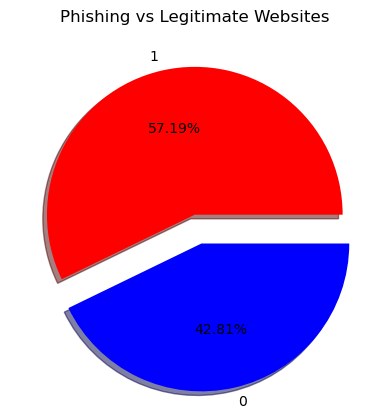

In [19]:
plt.pie(df['label'].value_counts(), labels=df['label'].value_counts().index, colors=['red', 'blue'], autopct='%1.2f%%', shadow=True,explode=(0,0.2))
plt.title("Phishing vs Legitimate Websites")
plt.show()

Count of Phishing vs Legitimate Websites

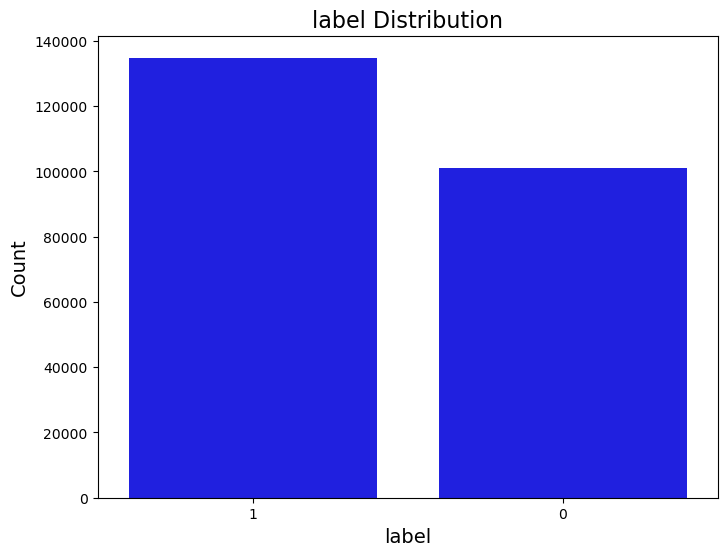

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(x='label',data=df,color='blue',order=df['label'].value_counts().index)
plt.xlabel('label', fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('label Distribution', fontsize=16)
plt.show()

TLD distribution

In [23]:
#checking TLD 
df.groupby('label')['TLD'].unique().tolist()

[array(['com', 'ru', 'gq', 'de', 'app', 'io', 'club', 'today', 'cloud',
        'org', 'xyz', 'co', 'dev', 'ga', 'ws', '123', 'cf', 'me', 'life',
        'net', 'site', 'shop', 'top', 'info', 'br', 'cc', 'tv', 'lt',
        'online', 'id', 'review', 'bar', 'link', 'one', '94', 'live', 'cn',
        'gd', 'it', 'uk', 'win', 'su', 'es', 'cz', 'biz', 'in', 'store',
        'page', 'se', 'il', 'sh', 'quest', 'fr', 'us', 'tk', 'vip',
        'agency', 'cyou', 'kz', '128', 'ml', 'az', 'at', 'download', 'ua',
        'finance', 'ug', 'cool', 'sg', 'ar', 'nz', 'eu', 'gr', 'moe',
        'icu', '103', 'fun', '130', 'cm', 'xn--c1avg', 'vg', 'be', 'ir',
        'je', 'pk', 'nl', 'za', 'st', 'ro', 'ly', 'bid', 'bio', 'pl', 'jp',
        'world', 'law', 'digital', 'mx', 'au', 'ng', 'hu', 'email', 'hn',
        'blog', 'stream', 'ca', 'ht', 'lc', 'tr', 'website', 'im', 'cl',
        'th', 'gp', 'ch', 'hk', 'no', 'asia', 'kw', 'sv', 'cat', 'to',
        'vn', 'art', 'cfd', 'pt', 'bo', 'mobi', 'pw', '

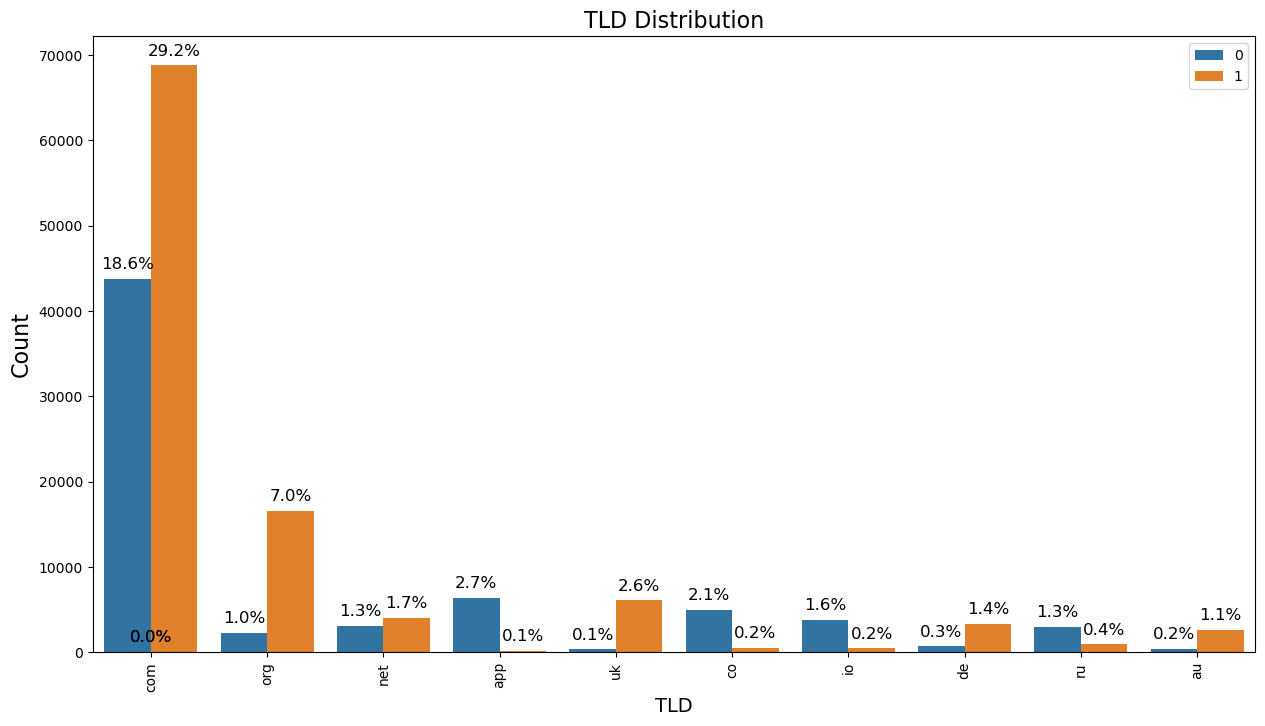

In [24]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='TLD', data=df, order=df['TLD'].value_counts().head(10).index,hue='label')

# Calculate total counts for percentage calculation
total_counts = len(df)

# Add percentage labels
for p in ax.patches:
    height = p.get_height()  # Get bar height
    percentage = f'{100 * height / total_counts:.1f}%'  # Compute percentage
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')


plt.xticks(rotation=90)
plt.xlabel('TLD', fontsize=14)
plt.ylabel('Count', fontsize=16)
plt.title('TLD Distribution', fontsize=16)
plt.legend()
plt.show()

relplot with URLLength, CharCount, Label

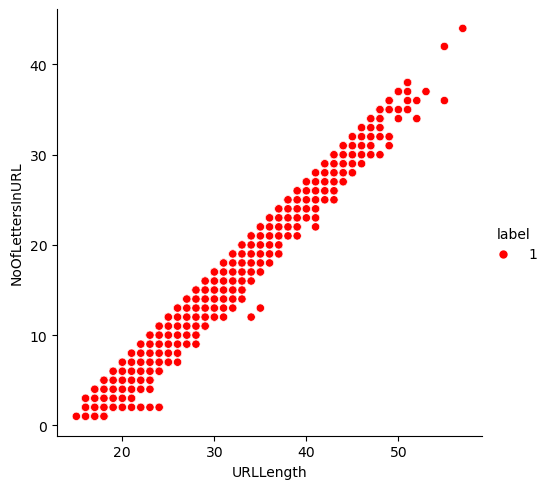

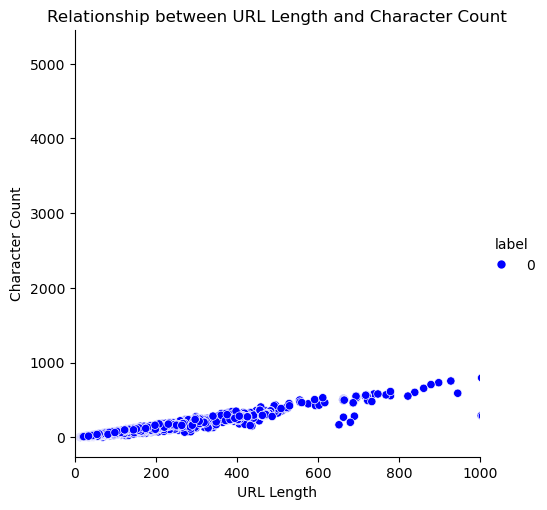

In [26]:
relevant_columns = df[df['label'] == 1][['URLLength', 'NoOfLettersInURL', 'label']]
relevant_columns1 = df[df['label'] == 0][['URLLength', 'NoOfLettersInURL', 'label']]
#relevant_columns=df.groupby(df['label']==1)[['URLLength', 'NoOfLettersInURL', 'label']]
#relevant_columns = df[['URLLength', 'NoOfLettersInURL', 'label']]
sns.relplot(data=relevant_columns, x='URLLength', y='NoOfLettersInURL', hue='label', style='label',palette={0: 'blue', 1: 'red'})
sns.relplot(data=relevant_columns1, x='URLLength', y='NoOfLettersInURL', hue='label', style='label',palette={0: 'blue', 1: 'red'})
plt.xlim(0,1000)
plt.title('Relationship between URL Length and Character Count')
plt.xlabel('URL Length')
plt.ylabel('Character Count')

plt.show()

line plot of urllength and label

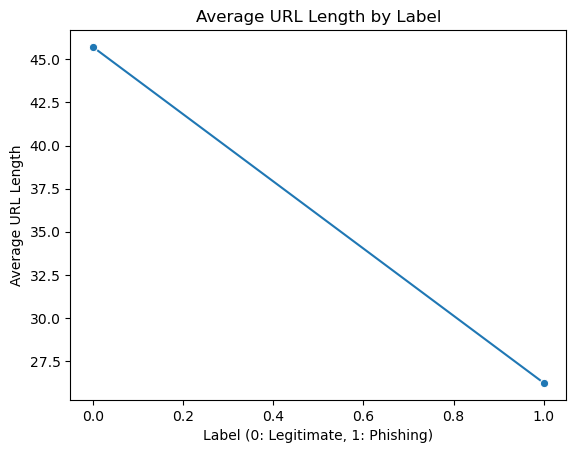

In [28]:
# Calculate the average URL length for each label
average_length = df.groupby('label')['URLLength'].mean().reset_index()
average_length.columns = ['label', 'average_length']

# Create a line plot
sns.lineplot(data=average_length, x='label', y='average_length', marker='o')

# Add titles and labels
plt.title('Average URL Length by Label')
plt.xlabel('Label (0: Legitimate, 1: Phishing)')
plt.ylabel('Average URL Length')

# Show the plot
plt.show()

Scatter plot of url length vs number of letters in url

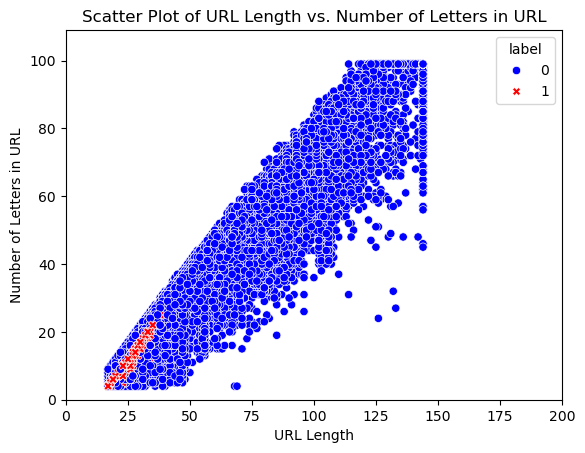

In [67]:
sns.scatterplot(data=df, x='URLLength', y='NoOfLettersInURL', hue='label', style='label', palette={0: 'blue', 1: 'red'})

# Add titles and labels
plt.title('Scatter Plot of URL Length vs. Number of Letters in URL')
plt.xlabel('URL Length')
plt.ylabel('Number of Letters in URL')

# Show the plot
plt.xlim(0, 200)  # Adjust x-axis limits as needed
plt.ylim(0, df['NoOfLettersInURL'].max() + 10)  # Adjust y-axis limits as needed
plt.show()

Number of digits in url vs target

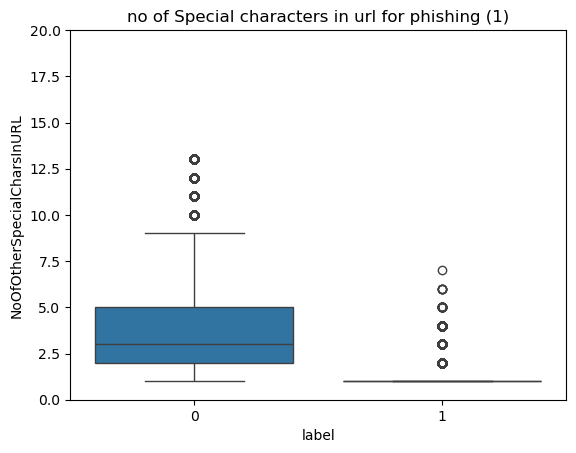

In [73]:
sns.boxplot(data=df,y="NoOfOtherSpecialCharsInURL",x="label")
plt.title("no of Special characters in url for phishing (1)")
plt.ylim(0,20)
plt.show()

Number of characters in url vs target

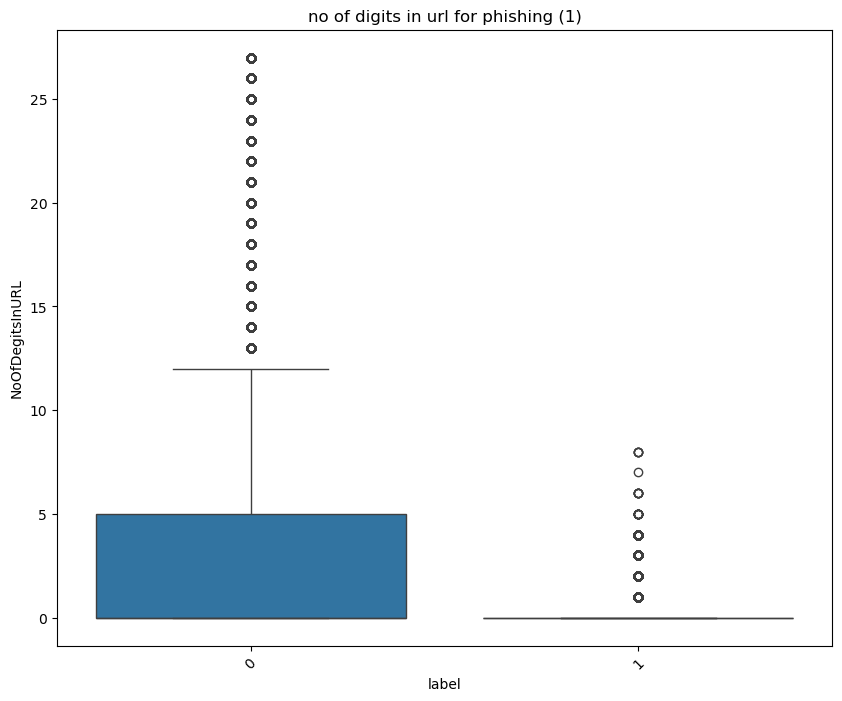

In [83]:
plt.figure(figsize=(10,8),dpi=100)
sns.boxplot(data=df,y="NoOfDegitsInURL",x="label")
plt.xticks(rotation=45)
plt.title("no of digits in url for phishing (1)")
plt.show()

Length of url vs target

Text(0.5, 1.0, 'length of url vs target')

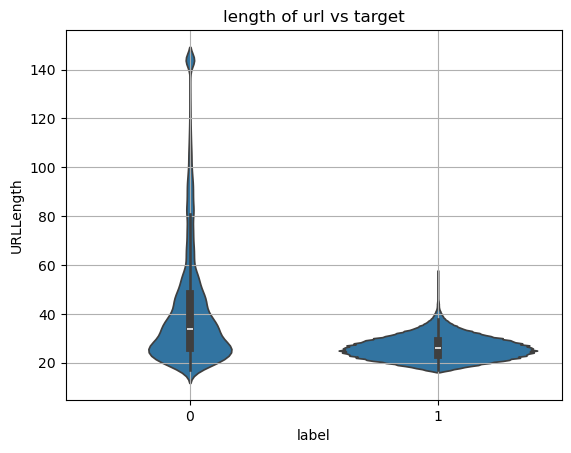

In [85]:
#plt.figure(figsize=(10,8),dpi=100)
sns.violinplot(data=df,x="label",y='URLLength')
plt.grid()
plt.title("length of url vs target")

Outliers handling

Outliers per column before handling:
 NoOfSubDomain                 57389
Pay                           55885
NoOfDegitsInURL               51461
DegitRatioInURL               51461
IsHTTPS                       51256
NoOfEmptyRef                  38885
NoOfiFrame                    34441
HasTitle                      32714
NoOfURLRedirect               31464
Bank                          29967
HasPasswordField              24113
NoOfExternalRef               22780
URLLength                     22493
NoOfLettersInURL              19662
LineOfCode                    19280
NoOfImage                     18362
NoOfCSS                       17906
LargestLineLength             17503
NoOfSelfRef                   15576
DomainLength                  13474
NoOfPopup                     13411
NoOfOtherSpecialCharsInURL    12380
NoOfJS                        11852
HasExternalFormSubmit         10372
NoOfSelfRedirect               9457
URLCharProb                    8569
NoOfQMarkInURL            

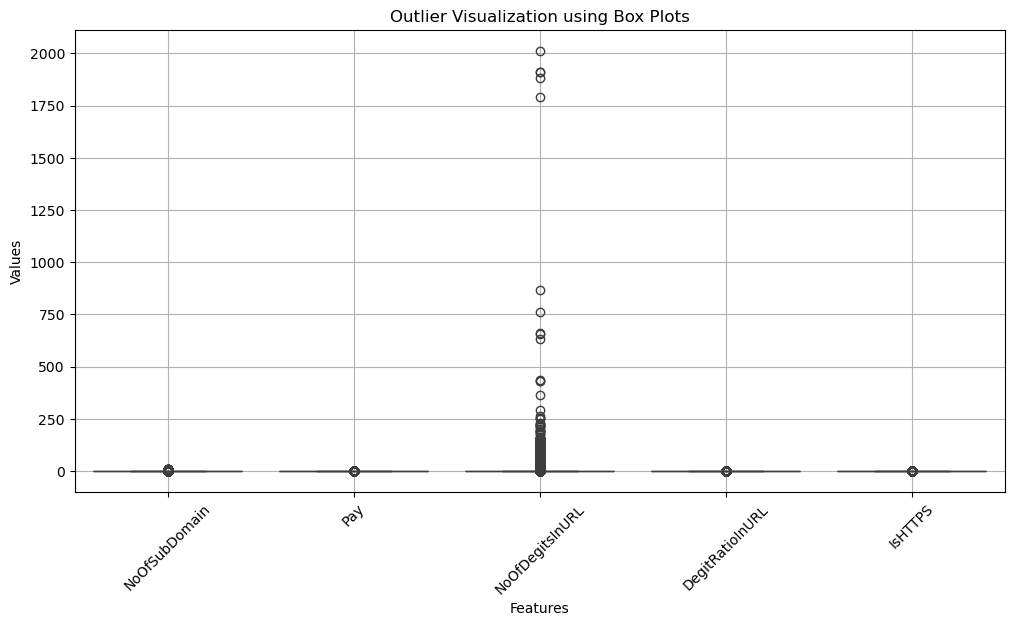


Outliers per column after handling:
 NoOfSubDomain                 57389
Pay                           55885
NoOfDegitsInURL               51461
DegitRatioInURL               51461
IsHTTPS                       51256
NoOfEmptyRef                  38885
NoOfiFrame                    34441
HasTitle                      32714
NoOfURLRedirect               31464
Bank                          29967
HasPasswordField              24113
NoOfExternalRef               22780
URLLength                     22493
NoOfLettersInURL              19662
LineOfCode                    19280
NoOfImage                     18362
NoOfCSS                       17906
LargestLineLength             17503
NoOfSelfRef                   15576
DomainLength                  13474
NoOfPopup                     13411
NoOfOtherSpecialCharsInURL    12380
NoOfJS                        11852
HasExternalFormSubmit         10372
NoOfSelfRedirect               9457
URLCharProb                    8443
NoOfQMarkInURL            

In [36]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75) 
IQR = Q3 - Q1  

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_counts = ((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).sum()
print("Outliers per column before handling:\n", outlier_counts.sort_values(ascending=False))
print("*******************************************")
# Select top 5 numerical columns with the most outliers
top_outlier_cols = outlier_counts.sort_values(ascending=False).head(5).index.tolist()

# Plot box plots for outlier visualization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[top_outlier_cols])
plt.xticks(rotation=45)
plt.title("Outlier Visualization using Box Plots")
plt.xlabel("Features")
plt.ylabel("Values")
plt.grid(True)
plt.show()
for col in numerical_cols:
    lower_clip = df[col].quantile(0.01)  
    upper_clip = df[col].quantile(0.99) 
    df[col] = df[col].clip(lower=lower_clip, upper=upper_clip)

outlier_counts_after = ((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).sum()
print("\nOutliers per column after handling:\n", outlier_counts_after.sort_values(ascending=False))



Data after outlier handling

In [38]:
df

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,...,0,0,1,34.00,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,...,0,0,1,50.00,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,...,0,0,1,10.00,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,...,1,1,1,3.00,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,...,1,0,1,243.06,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,...,1,0,1,51.00,7,21,187,2,191,1
235791,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,...,1,0,0,50.00,1,7,88,0,31,1
235792,622132.txt,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,...,0,0,1,27.00,10,30,58,2,67,1
235793,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,...,0,0,0,0.00,0,3,0,0,0,0
